In [13]:
# INCEPTION V3 NEURAL NETWORK TO CLASSIFY IMAGES INTO ONE OF THE 10 DISTRACTIONS

# the method to use and implement this model is outlined in the ReadMe file

# Sources cited:
# https://keras.io/guides/transfer_learning/
# https://keras.io/api/applications/#usage-examples-for-image-classification-models
# https://keras.io/api/data_loading/
# https://medium.com/@italojs/saving-your-weights-for-each-epoch-keras-callbacks-b494d9648202
# https://datascience.stackexchange.com/questions/104572/does-validation-split-in-tf-keras-preprocessing-image-dataset-from-directory-res
# Code also borrowed from the solution of P-Set 2 (CAS CS 523, Deep Learning, Professor Sarah)

# The dataset is located on the Google Drive, Link:
# https://drive.google.com/drive/folders/1XQwlyOjZL0dPDbWagURrSqa1dC6rDkgW?usp=sharing

# importing files and libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import glob
import keras
#import tensorflow_addons as tfa
from keras.preprocessing.image import smart_resize
from PIL import Image
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import Sequence
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# mounting Google drive
# the dataset is stored on the drive

from google.colab import drive 
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
#folder='/content/drive/MyDrive/CS523_Deep_Learning/Data/train/c'

#filelist = glob.glob(folder + '0' + '/*.jpg')
#train_images = np.array([np.array(Image.open(fname)) for fname in filelist])
#train_labels = np.zeros((train_images.shape[0],), dtype=int)

#for i in range(1,10):
#    folder_i = folder+str(i)
#    filelist = glob.glob(folder_i + '/*.jpg')
#    temp=np.array([np.array(Image.open(fname)) for fname in filelist])
#    train_images = np.vstack((train_images, temp))
#    train_labels = np.hstack((train_labels, np.zeros((temp.shape[0],), dtype=int) + i))


In [ ]:
#size=0.9*train_images.shape[0]
#temp=np.hstack((train_images, train_labels))
#concat=np.random.shuffle(temp)

#print(concat.shape)
#train_val_images=x[int(size):None]
#train_val_labels=y[int(size):None]

#train_train_images=x[0:int(size)]
#train_train_labels=y[0:int(size)]
#print(size)
#print(train_train_images.shape)

In [ ]:
#folder='/content/drive/MyDrive/CS523_Deep_Learning/Data/TestData/c'

#filelist = glob.glob(folder + '0' + '/*.jpg')
#test_images = np.array([np.array(Image.open(fname)) for fname in filelist])
#test_labels = np.zeros((test_images.shape[0],), dtype=int)

#for i in range(1,10):
#    folder_i = folder+str(i)
#    filelist = glob.glob(folder_i + '/*.jpg')
#    temp=np.array([np.array(Image.open(fname)) for fname in filelist])
#    test_images = np.vstack((test_images, temp))
#    test_labels = np.hstack((test_labels, np.zeros((temp.shape[0],), dtype=int) + i))

In [3]:
# Extracting training, validation and test data sets

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/CS523_Deep_Learning/Data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    seed=42,
    shuffle=True,
    validation_split=0.1,
    subset='training',
    image_size=(480, 640))

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/CS523_Deep_Learning/Data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    seed=42,
    shuffle=True,
    validation_split=0.1,
    subset='validation',
    image_size=(480, 640))

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/CS523_Deep_Learning/Data/TestData',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    seed=42,
    shuffle=True,
    image_size=(480, 640))

Found 20405 files belonging to 10 classes.
Using 18365 files for training.
Found 20405 files belonging to 10 classes.
Using 2040 files for validation.
Found 2019 files belonging to 10 classes.


In [4]:
# Inception V3 model with transfer learning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(480, 640, 3))

base_model.trainable = False
inputs = keras.Input(shape=(480, 640, 3))

scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
inputs = scale_layer(inputs)

x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x) 

x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x) 

predictions = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs=predictions)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

#class DataGenerator(Sequence):
#   def __init__(self, x_set, y_set, batch_size):
#        self.x, self.y = x_set, y_set
#        self.batch_size = batch_size

 #   def __len__(self):
 #       return int(np.ceil(len(self.x) / float(self.batch_size)))

 #   def __getitem__(self, idx):
 #       batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
 #       batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
 #       return batch_x, batch_y

#train_gen = DataGenerator(train_train_images, train_train_labels, 32)
#test_gen = DataGenerator(test_images, test_labels, 32)
#val_gen = DataGenerator(train_val_images, train_val_labels, 32)

history=model.fit(train_ds, epochs=7, validation_data=val_ds)

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 480, 640, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 13, 18, 2048)      21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


574/574 [==============================] - 1112s 2s/step - loss: 4.1174 - accuracy: 0.1144 - val_loss: 2.3005 - val_accuracy: 0.1093
Epoch 2/7
574/574 [==============================] - 159s 277ms/step - loss: 2.3046 - accuracy: 0.1123 - val_loss: 2.2999 - val_accuracy: 0.1093
Epoch 3/7
574/574 [==============================] - 159s 277ms/step - loss: 2.2927 - accuracy: 0.1109 - val_loss: 2.2394 - val_accuracy: 0.1093
Epoch 4/7
574/574 [==============================] - 159s 277ms/step - loss: 2.2508 - accuracy: 0.1290 - val_loss: 2.2306 - val_accuracy: 0.1314
Epoch 5/7
574/574 [==============================] - 159s 277ms/step - loss: 2.2119 - accuracy: 0.1426 - val_loss: 2.1473 - val_accuracy: 0.1632
Epoch 6/7
574/574 [==============================] - 159s 277ms/step - loss: 2.1868 - accuracy: 0.1475 - val_loss: 2.0871 - val_accuracy: 0.1809
Epoch 7/7
574/574 [==============================] - 159s 277ms/step - loss: 2.1637 - accuracy: 0.1518 - val_loss: 2.0624 - val_accuracy: 0.16

In [6]:
# Inception V3 model with fine tuning

base_model.trainable = True
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

checkpoint = ModelCheckpoint("/content/drive/MyDrive/CS523_Deep_Learning", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)

history=model.fit(train_ds, epochs=7, validation_data=val_ds, callbacks=[checkpoint])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 480, 640, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 13, 18, 2048)      21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


574/574 [==============================] - ETA: 0s - loss: 2.0168 - accuracy: 0.1742
Epoch 1: loss improved from inf to 2.01676, saving model to /content/drive/MyDrive/CS523_Deep_Learning
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS523_Deep_Learning/assets
574/574 [==============================] - 571s 978ms/step - loss: 2.0168 - accuracy: 0.1742 - val_loss: 1.7900 - val_accuracy: 0.2020
Epoch 2/7
574/574 [==============================] - ETA: 0s - loss: 1.6125 - accuracy: 0.3586
Epoch 2: loss improved from 2.01676 to 1.61248, saving model to /content/drive/MyDrive/CS523_Deep_Learning
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS523_Deep_Learning/assets
574/574 [==============================] - 559s 974ms/step - loss: 1.6125 - accuracy: 0.3586 - val_loss: 0.8474 - val_accuracy: 0.7157
Epoch 3/7
574/574 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.8107
Epoch 3: loss improved from 1.61248 to 0.56275, saving model to /content/dr

In [7]:
model.save('/content/drive/MyDrive/CS523_Deep_Learning/Nets')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS523_Deep_Learning/Nets/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS523_Deep_Learning/Nets/assets


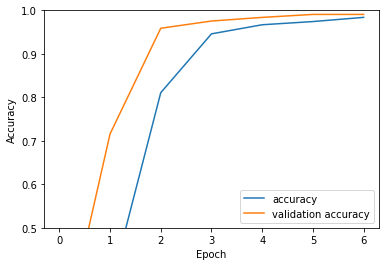

In [8]:
# plots

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
# Test Accuracy

test_loss, test_acc = model.evaluate(test_ds)
print(test_acc)

64/64 [==============================] - 16s 245ms/step - loss: 1.5987 - accuracy: 0.6984
0.6983655095100403


In [15]:
# Confusion matrix

y_pred=model.predict(test_ds)
cm=confusion_matrix(test_ds.classes,y_pred)
print(cm)

AttributeError: ignored

In [16]:
# Precision

m = tf.keras.metrics.Precision()
m.update_state(test_ds, y_pred)
m.result().numpy()

ValueError: ignored

In [17]:
# Recall

n = tf.keras.metrics.Recall()
n.update_state(test_ds, y_pred)
n.result().numpy()

ValueError: ignored

In [21]:
# F1 Score

metric = tfa.metrics.F1Score(num_classes=10, average='micro')
metric.update_state(test_ds, y_pred)
result = metric.result()
result.numpy()

NameError: ignored

In [18]:
# Classification Report 

print(classification_report(test_ds, y_pred))

ValueError: ignored